In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import numpy as np
from keras.optimizers import *
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_root = '/content/drive/My Drive/dataset'

In [4]:
img_width, img_height = 150, 150
  
train_data_dir = '/content/drive/My Drive/dataset/train'
validation_data_dir = '/content/drive/My Drive/dataset/test'
train_samples = 240
validation_samples = 60
epochs = 10
batch_size = 10

In [5]:
from keras import backend as K 
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [6]:
train_datagen = ImageDataGenerator( 
                rotation_range=20.,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='categorical') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 64)       

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                   metrics=['categorical_accuracy'])

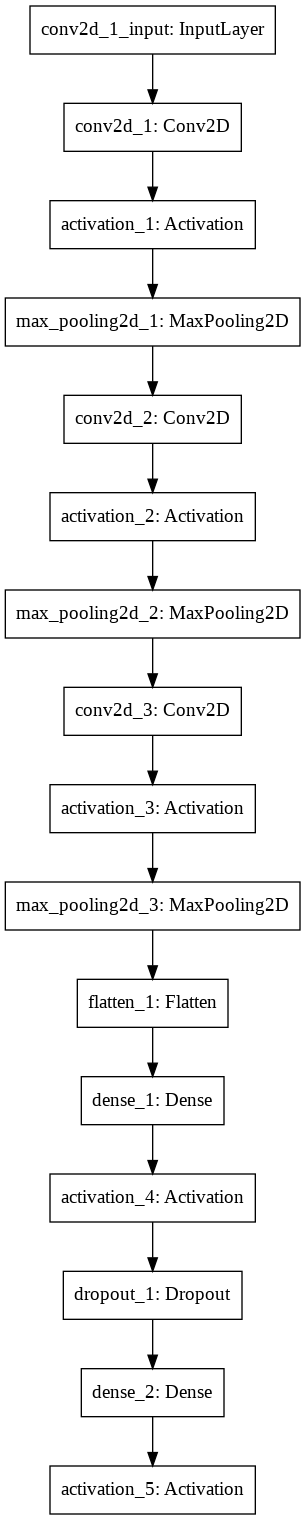

In [10]:
from keras.utils import plot_model
plot_model(model,to_file='model.png')

In [11]:
history=  model.fit_generator(train_generator, 
    steps_per_epoch = train_samples, 
    epochs = 20, 
    validation_data = validation_generator, 
    validation_steps = validation_samples) 

Epoch 1/20
240/240 [==============================] - 21s 86ms/step - loss: 8.1232 - categorical_accuracy: 0.5033 - val_loss: 1.0996 - val_categorical_accuracy: 0.4000
Epoch 2/20
240/240 [==============================] - 19s 78ms/step - loss: 1.0788 - categorical_accuracy: 0.6208 - val_loss: 1.1099 - val_categorical_accuracy: 0.3500
Epoch 3/20
240/240 [==============================] - 19s 80ms/step - loss: 0.8465 - categorical_accuracy: 0.6908 - val_loss: 1.0824 - val_categorical_accuracy: 0.5667
Epoch 4/20
240/240 [==============================] - 19s 78ms/step - loss: 0.8079 - categorical_accuracy: 0.7321 - val_loss: 1.0935 - val_categorical_accuracy: 0.3333
Epoch 5/20
240/240 [==============================] - 19s 78ms/step - loss: 0.6484 - categorical_accuracy: 0.7704 - val_loss: 1.0717 - val_categorical_accuracy: 0.3833
Epoch 6/20
240/240 [==============================] - 19s 78ms/step - loss: 0.6320 - categorical_accuracy: 0.7779 - val_loss: 1.0759 - val_categorical_accuracy:

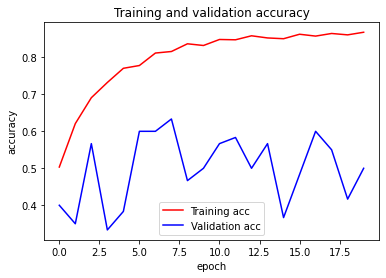

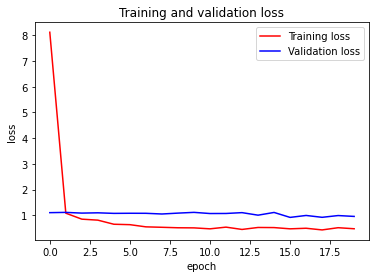

In [16]:
import matplotlib.pyplot as plt 
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [17]:
from keras.callbacks import *

earlstop=EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0,mode='auto',baseline=None)



model.fit_generator(train_generator, 
    steps_per_epoch = train_samples, 
    epochs = 20, 
    callbacks=[earlstop],
    validation_data = validation_generator, 
    validation_steps = 10)

Epoch 1/20
240/240 [==============================] - 18s 73ms/step - loss: 0.4268 - categorical_accuracy: 0.8671 - val_loss: 1.3958 - val_categorical_accuracy: 0.4300
Epoch 2/20
240/240 [==============================] - 17s 73ms/step - loss: 0.4613 - categorical_accuracy: 0.8717 - val_loss: 0.6609 - val_categorical_accuracy: 0.4600
Epoch 3/20
240/240 [==============================] - 17s 72ms/step - loss: 0.4688 - categorical_accuracy: 0.8854 - val_loss: 3.1444 - val_categorical_accuracy: 0.3900
Epoch 4/20
240/240 [==============================] - 17s 72ms/step - loss: 0.4600 - categorical_accuracy: 0.8737 - val_loss: 1.3588 - val_categorical_accuracy: 0.4000


In [18]:
from keras.models import load_model
model.save('my_model.h5')
del model

model = load_model('my_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 64)       

In [19]:
pred = model.predict_generator(validation_generator,steps=100)